In [6]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
def findCM(df, label):
    labels = [0,1,2]

    tp= df.loc[label,label]
    fp = df[label].sum() - tp
    fn = df.loc[label].sum() - tp

    df = df.drop(label, axis=0)
    df = df.drop(label, axis=1)

    tn = df.sum().sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return precision, recall, specificity

i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50


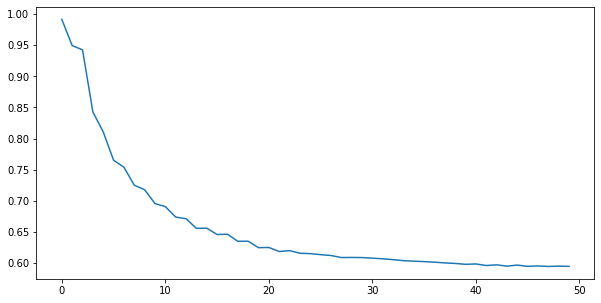

In [16]:
if __name__ == '__main__':
    data = pd.read_csv('KNN_dataset.csv')
    data['Group'] = data['Group'].replace('CN', 0)
    data['Group'] = data['Group'].replace('MCI', 1)
    data['Group'] = data['Group'].replace('AD', 2)

    data = data.drop('Filename', axis=1)

    y = data['Group']
    x = data.drop('Group', axis=1)


    min_max_scaler = MinMaxScaler()
    _ = min_max_scaler.fit(x)
    x = min_max_scaler.transform(x)

    y = y.to_numpy()
    
    rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=777)
    
    acc_hist = []
    precision0_hist = []
    recall0_hist = []
    precision1_hist = []
    recall1_hist = []
    precision2_hist = []
    recall2_hist = []
    
    for i in range(1,51): 
        scores = []
        
        precision0_list = []
        recall0_list = []
        precision1_list = []
        recall1_list = []
        precision2_list = []
        recall2_list = []
        
        
        print('i = ', i)
        for idx, (train_idx, test_idx) in enumerate(rkf.split(x)):
        
            train_x, test_x = x[train_idx], x[test_idx]
            train_y, test_y = y[train_idx], y[test_idx]

            model = KNeighborsClassifier(n_neighbors=i)
            model.fit(train_x, train_y)

            pred = model.predict(test_x)
            
            cm = confusion_matrix(test_y, pred)
            
            cm = pd.DataFrame(cm)
            
            precision0, recall0, _ = findCM(cm,0)
            precision1, recall1, _ = findCM(cm,1)
            precision2, recall2, _ = findCM(cm,2)

            
            precision0_list.append(precision0)
            recall0_list.append(recall0)
            precision1_list.append(precision1)
            recall1_list.append(recall1)
            precision2_list.append(precision2)
            recall2_list.append(recall2)
            
#             print('Precision (NC): ', precision0)
#             print('Recall (NC): ', recall0)
                        
#             print('Precision (MCI): ', precision1)
#             print('Recall (MCI): ', recall1)
                        
#             print('Precision (AD): ', precision2)
#             print('Recall (AD): ', recall2)

            scores.append(model.score(test_x, test_y))


        sum_score = 0
        sum_precision0 = 0
        sum_recall0 = 0
        sum_precision1 = 0
        sum_recall1 = 0
        sum_precision2 = 0
        sum_recall2 = 0
        
        for j in range(100):
            sum_score += scores[j]
            sum_precision0 += precision0_list[j]
            sum_recall0 += recall0_list[j]
            
            sum_precision1 += precision1_list[j]
            sum_recall1 += recall1_list[j]
            
            sum_precision2 += precision2_list[j]
            sum_recall2 += recall2_list[j]
            

        avg_acc = sum_score/100
        acc_hist.append(avg_acc)
        
        precision0_hist.append(sum_precision0/100)
        recall0_hist.append(sum_recall0/100)
        
        precision1_hist.append(sum_precision1/100)
        recall1_hist.append(sum_recall1/100)
        
        precision2_hist.append(sum_precision2/100)
        recall2_hist.append(sum_recall2/100)
    
    
    plt.figure(figsize=(10,5))
    plt.plot(acc_hist)
    plt.show()


50


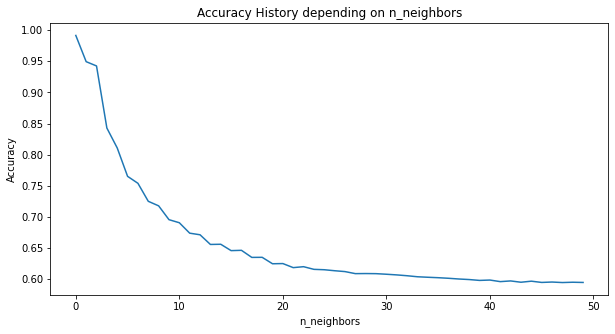

In [5]:
print(len(acc_hist))

plt.figure(figsize=(10,5))
plt.title("Accuracy History depending on n_neighbors")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.plot(acc_hist)
plt.show()

50


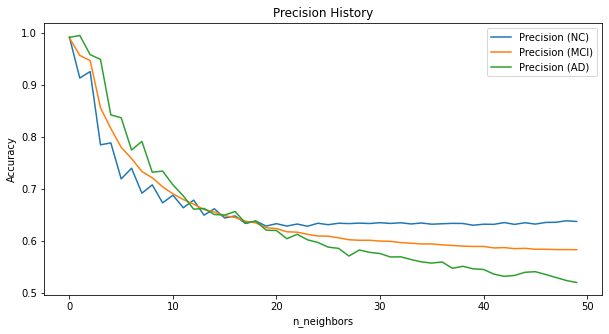

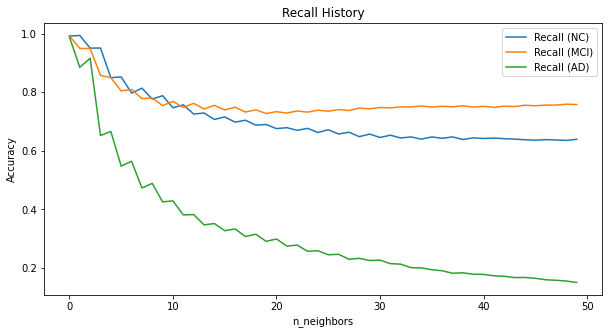


NC
0.9923463355628706
0.9259930254641303
0.7883949167755592
0.672867743126046

MCI
0.9910193802583058
0.947098727104964
0.8162416445651988
0.703792233090148

AD
0.9916927032050918
0.95855722084804
0.8424174194136242
0.7341559738661236
Accuracy
0.9915111111111103
0.9424888888888896
0.8107111111111113
0.6954666666666669

NC
0.9918974272717505
0.9507825639659395
0.8497397964435143
0.7883944895254636

MCI
0.992667746178912
0.949593090828073
0.8498444644821401
0.7545483568530967

AD
0.9885794796452188
0.916197790528399
0.6661353012938502
0.4257620766646276


In [26]:
print(len(acc_hist))

plt.figure(figsize=(10,5))
plt.title("Precision History")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.plot(precision0_hist, label='Precision (NC)')
plt.plot(precision1_hist, label='Precision (MCI)')
plt.plot(precision2_hist, label='Precision (AD)')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Recall History")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.plot(recall0_hist, label='Recall (NC)')
plt.plot(recall1_hist, label='Recall (MCI)')
plt.plot(recall2_hist, label='Recall (AD)')
plt.legend()
plt.show()


print('\nNC')
print(precision0_hist[0])
print(precision0_hist[2])
print(precision0_hist[4])
print(precision0_hist[9])


print('\nMCI')
print(precision1_hist[0])
print(precision1_hist[2])
print(precision1_hist[4])
print(precision1_hist[9])


print('\nAD')
print(precision2_hist[0])
print(precision2_hist[2])
print(precision2_hist[4])
print(precision2_hist[9])




print('Accuracy')
print(acc_hist[0])
print(acc_hist[2])
print(acc_hist[4])
print(acc_hist[9])






print('\nNC')
print(recall0_hist[0])
print(recall0_hist[2])
print(recall0_hist[4])
print(recall0_hist[9])


print('\nMCI')
print(recall1_hist[0])
print(recall1_hist[2])
print(recall1_hist[4])
print(recall1_hist[9])


print('\nAD')
print(recall2_hist[0])
print(recall2_hist[2])
print(recall2_hist[4])
print(recall2_hist[9])

